<a href="https://colab.research.google.com/github/asy047/TensorFlowDeepLearning/blob/master/0726_Day02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층신경망

# 인공신경망의 신호 전달 원리

* 임계치가 초과할 때 신호를 전달

  이 신호를 잘 받아서 활성화 함수를 실행할지 말지 검사를 함

1. 시그모이드 함수
  activation='sigmoid'

  S자로 생긴 곡선을 sigmoid 곡선이라고 부름
  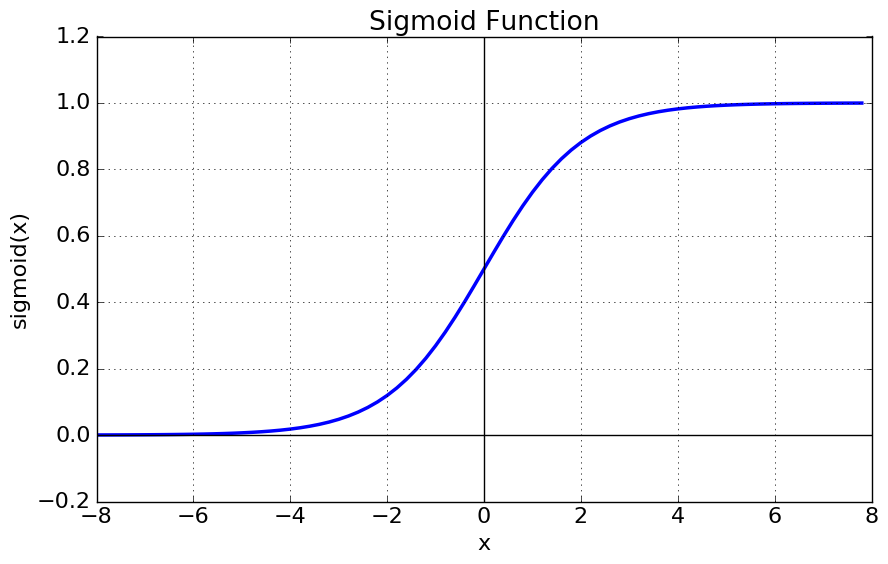{: width="100" height="100"}

  가로축이 나한테 전달된 신호들의 총 합.

  총 합이 0.5보다 크면 1에 가까운 값을 출력, 0.5보다 작으면 0에 가까운 값을 출력.

  이런 함수를 시그모이드 함수.

  치명적인 단점이란? 왼쪽과 오른쪽 끝으로 갈 수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못함

  (특히, 층이 많은 심층신경망일 수록 그 효과가 누적되어 학습을 더 어렵게 만듦)

2. 하이퍼볼릭 탄젠트 함수 activation="tanh"

  0과 1 사이가 아니라 1과 -1까지 음수 값까지 출력해주는 함수.

  이 활성화 함수로 동작해~라고 컴퓨터한테 알려줘야 함.


3. **렐루 (Rectified Linear Unit, ReLU) 함수 activation="ReLU"**

  나한테 전달된 값이 음수라면 그냥 0으로 출력 하겠다.

  만약에 양수라면 값을 계산해서 알맞은 양수로 출력하겠다. (y=x)

  왜 중요한가? 시그모이드 함수가 단점이 있다. 그 단점을 보완하기 위해 렐루 함수가 생겨났고, 이 때문에 딥러닝이 생길 수 있었다.
  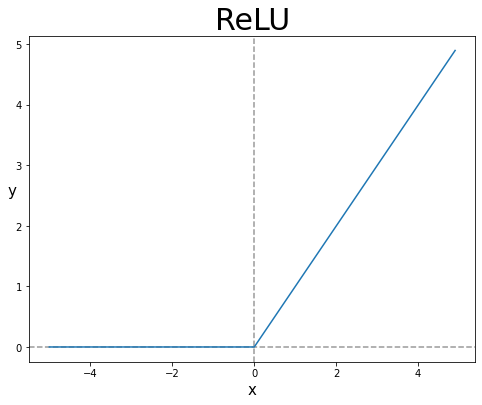{: width="100" height="100"}

4. Leaky 렐루 함수

  Leaky = 누수되다.

  그냥 렐루 함수는 음수가 들어오면 0을 출력했었는데, 그게 아니라 기울기가 완만한 음수로 출력을 하자. 라는 함수.

  조금 아래로 누수된다고 생각하면 됨.

5. **softmax 함수** 다중분류에서 사용

  특이한게 이 아이는 확률값을 계산 후, 반환한다.

  은닉층에서 쓰지 않고 출력층에서 씀.

  가장 높은 확률을 갖고 있는 녀석으로 출력을 내보내는 것이다.

  다중분류: 0-9까지 숫자 분류, 하이힐 옷 원피스 등등 분류할 때.

  **반드시 다중분류에서 출력층에 설정을 해줘야하는 함수**

# 데이터 불러오기

from tensorflow import keras

(train_data, train_labels), (test_data, test_labels) = keras.datasets.fashion_mnist.load_data()

In [33]:
from tensorflow import keras

(train_data, train_labels), (test_data, test_labels) = keras.datasets.fashion_mnist.load_data()

In [8]:
# scikit-learn --> sklearn
from sklearn.model_selection import train_test_split

x_train_scaled = train_data / 255.0  # 정규화
print(x_train_scaled.shape)

x_train_scaled = x_train_scaled.reshape(-1, 28 * 28)  # -1이라고 적으면 자기가 알아서 60000이라고 세서 넣어줌
print(x_train_scaled.shape)

(60000, 28, 28)
(60000, 784)


In [10]:
x_train_scaled, x_val_scaled, y_train, y_val = train_test_split(x_train_scaled, train_labels, test_size = 0.2, random_state = 42)

# x_train_scaled <= 1D 이미지 데이터 6만장
# y_train <= 정답 6만개
# train_test_split 으로 쪼개면 x_train(4만), x_validation(2만)으로 나눠짐.
# x_validation -> 검증용(모델이 잘 풀고 있는지 감독)
# y_train 또한 y_train, y_validation으로 4만, 2만으로 쪼갠다.
# random_state -> 교육용 parameter

In [12]:
# 60000 * 0.2 = 12000
# 60000 - 12000 = 48000

print("학습용 데이터셋:", x_train_scaled.shape)
print("검증용 데이터셋:", x_val_scaled.shape)

print("학습용 데이터셋:", y_train.shape)
print("검증용 데이터셋:", y_val.shape)

학습용 데이터셋: (48000, 784)
검증용 데이터셋: (12000, 784)
학습용 데이터셋: (48000,)
검증용 데이터셋: (12000,)


In [13]:
import tensorflow as tf

# 밀집층 (dense layer)
## 첫 번째 은닉층 (입력층과 출력층 사이에 존재!)
layer1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ));

## 출력층의 역할을 수행
layer2 = keras.layers.Dense(10, activation='softmax')

In [14]:
model = keras.Sequential([layer1, layer2]) # 이 두개의 layer가 한 덩어리의 리스트라고 알려줘야 함

In [15]:
model.summary()
# 78500이 어떻게 계산이 된거지?
#   78500 <- 딥러닝 모델을 구성하는 파라미터 개수
#             입력층(784, input_shape으로 알려줬었음)
#             784*100+100 더하기 100은 bias(편향)
#   1010  <-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 모델을 만드는 방법 2
# 단점: 추가하는 층이 많아지면, 다루기 힘들어짐.

model_2 = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )), keras.layers.Dense(10, activation='softmax')])

In [20]:
# 모델을 만드는 방법 3 <-- 효율적임!!

model = keras.Sequential()  # 층이 없는 비어있는 모델 생성!!

model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='sparse_categorical_crossentropy',  # 손실, 에러, **오차**
              metrics=['accuracy']) # 평가지표 -> 정확도가 관심이 있어

# sparse_categorical_crossentropy: 다중 분류

In [29]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5658 - accuracy: 0.8094
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4110 - accuracy: 0.8528
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3763 - accuracy: 0.8639
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3524 - accuracy: 0.8730
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3363 - accuracy: 0.8781


In [30]:
x_test_scaled = test_data / 255.0 # 정규화 (0~1사이의 값을 갖게함)
x_test_scaled = x_test_scaled.reshape(-1, 28*28)

model.evaluate(x_test_scaled, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8558


[0.40284910798072815, 0.8557999730110168]

<Figure size 640x480 with 0 Axes>

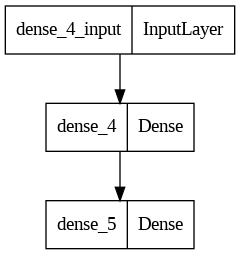

In [35]:
# 모델을 그래프로 그려줌

import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

plt.figure()
tf.keras.utils.plot_model(model)
plt.show()

plot_model(model, to_file = 'model.png')

In [ ]:
# 성능을 끌어 올려 보자
# 어떻게? --> 활성화 함수를 바꿔보자! (고급 함수로!)
# sigmoid (시그모이드 함수) --> ReLU (렐루 함수로 교체)

# 데이터 전처리 과정에서 배열 모양을 바꿨음!!
# reshape(-1, 28*28)
# 2D 이미지 (28 x 28) --> 1D 배열 (784, )

# kears.layers.Flatten()
# flat -> 서브웨이 -> 플랫 브레드

In [36]:
new_model = keras.Sequential()

new_model.add(keras.layers.Flatten(input_shape=(28, 28)))   # 너에게 행 28 열 28인 2차원 배열이 전달될 거니까 그걸 평평하게 flat하게 펴줘
new_model.add(keras.layers.Dense(100, activation='relu'))   # sigmoid 대신 relu 함수 추가
new_model.add(keras.layers.Dense(10, activation='softmax')) # 출력층은 softmax로 지정

new_model.summary()  # flatten은 단순히 2차원 배열을 1차원 배열로 바꿔주는 역할이니까 Param이 0이 찍힘

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 데이터셋 다시 받아오기. 2차원 파일로 하기 위해

(train_data, train_labels), (test_data, test_labels) = keras.datasets.fashion_mnist.load_data()
x_train_scaled = train_data / 255.0
x_test_scaled = test_data / 255.0
x_train_scaled, x_val_scaled, y_train, y_val = train_test_split(x_train_scaled, train_labels, test_size = 0.2, random_state = 42)

In [48]:
from keras.engine.training import optimizer
# 아래의 세가지 순서를 꼭 지켜야 함 compile, fit, evaluate

new_model.compile(loss='sparse_categorical_crossentropy',  # 손실, 에러, **오차**
                  optimizer='adam',
              metrics=['accuracy']) # 평가지표 -> 정확도가 관심이 있어

In [49]:
new_model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2394 - accuracy: 0.9133
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2290 - accuracy: 0.9161
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2155 - accuracy: 0.9213
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2121 - accuracy: 0.9225
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2026 - accuracy: 0.9247
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1996 - accuracy: 0.9259
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1907 - accuracy: 0.9287
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1857 - accuracy: 0.9302
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1833 - accuracy: 0.9314
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.177

In [51]:
new_model.evaluate(x_test_scaled, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3915 - accuracy: 0.8855


[0.3914865553379059, 0.8855000138282776]

# 옵티마이저

* 인공신경망 생성과정

  데이터 수집/로드 -> 데이터 전처리(정규화, 모양 바꾸기) -> 모델만들기 Squential(), add() -> compile() -> fit() -> evaluate()

옵티마이저는 compile() 단계에서 사용.

옵티마이저를 이해하기 전에 이해 해야하는 하이퍼 파라미터

<br>


## 하이퍼 파라미터 (Hyper Parameter)

Parameter에는 두 종류가 있다.

1. Model Parameter

  y = ax + b에서 w: 가중치와 b: 편향의 최적값을 찾아내는게 딥러닝

  학습을 통해서 찾아내는 parameter를 Model Parameter라고 부름.

  우리가 신경 쓸 필요가 없음. 컴퓨터가 다 찾아내고 미분해주고 하기 때문.

2. Hyper Parameter
  
  **인간이 반드시 지정해줘야하는 값.**

  * 은닉층의 개수(Dense)
  * 뉴런의 개수
  * 활성화 함수(Sigmoid -> relu)
  * 층의 종류 (Dense(), ConV2D(), Poolaxing())
  * 배치 사이즈 매개변수
  * 에포크 매개변수


## 그럼 옵티마이저는? / 옵티마이저의 종류

1. SGD
2. 모멘텀
3. 네스테로프 모멘텀
4. RMSprop
5. **Adam <-- 최고 성능**
6. Adagrad

데이터를 RAM에 올릴 수 있게끔 60000장을 100장으로 600개 분할을 한 수 한 세트씩 RAM에다 로드를 시킴.

*이 한 세트 => 미니 배치* 라고 부른다.

이 미니 배치의 평균값으로 가중치를 계산해 점점 더 정답을 찾아가는데, 그걸 찾아가는 방법에 대한 함수가 옵티마이저.

그냥 아담 쓰면 된다.